# Introduction to Classification using Neural Networks with TensorFlow


###Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [ ]:
# Check out features
X, X.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]), (1000, 2))

In [ ]:
# Check out the labels
y[:10], y.shape

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]), (1000,))

## Let's visualize our data

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1],"label":y })
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


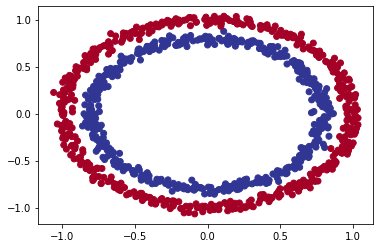

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
### Input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

### Steps in modelling


In [ ]:
import tensorflow as tf

In [ ]:
#Set random seed
tf.random.set_seed(42)
# 1. Create model
model_1 = tf.keras.Sequential([
                                  tf.keras.layers.Dense(1)
]) 

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                   optimizer = tf.keras.optimizers.SGD(),
                   metrics = ["accuracy"])
model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


### Experiments to improve our model

In [ ]:
# 1. Train for longer
model_1.fit(X, y, epochs=200,verbose=0)

In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [ ]:
# 2. Add an extra hidden layer
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])
model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

❓❗ Our model is still guessing not predicting!!

### Improving the model
Let's look in our bag of tricks to see how we can improve it

In [ ]:
# 3. Add an extra hidden layer and increase the number of hidden units
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# Compile the model 
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])
                

# Fit the model
#model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
#Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6577 - mae: 0.6577


[0.6577237844467163, 0.6577237844467163]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

### Write a function that plots decision boundary


In [ ]:
import numpy as np

In [ ]:

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X values (We're going to make predicions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class classification
  if len(y_pred[0]) > 1:
    print("Doing Multiclass Classifications")
    # Reshape our preds to make them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Doing binary classification


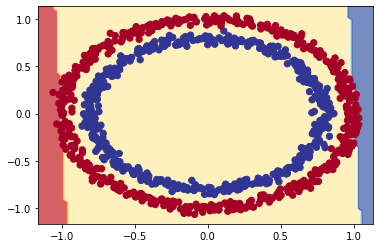

In [ ]:
# Check out predictions our model is making
plot_decision_boundary(model_3, X, y)

### Check if we can adapt our model to a regression problem

In [ ]:
tf.random.set_seed(42)
X_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5)

#Split our data into training and testing
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test  = y_reg[150:]

In [ ]:
# 3. Add an extra hidden layer and increase the number of hidden units
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# Compile the model 
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])
                
# Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

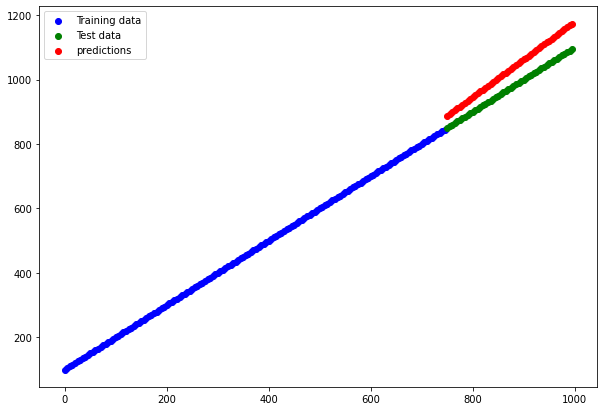

In [ ]:
# Make predictions
y_reg_pred = model_3.predict(X_reg_test)

#Plot preds
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_pred, c="r", label="predictions")
plt.legend() ;

##The missing piece : **Non-Linearity**

In [ ]:
# Trying to replicate our model from TensorFlow playground

# Set random Seed
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation = "linear")
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

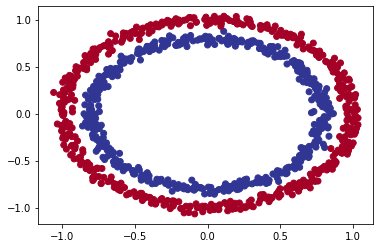

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu) ;

Doing binary classification


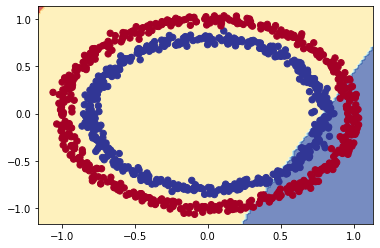

In [ ]:
# Check the decison boundary for our model
plot_decision_boundary(model_4, X, y)

Let's build our first model with non-linear activation function

In [ ]:
# Trying to replicate our model from TensorFlow playground
# Set random Seed
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
                              tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
# Evaluate
model_5.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Doing binary classification


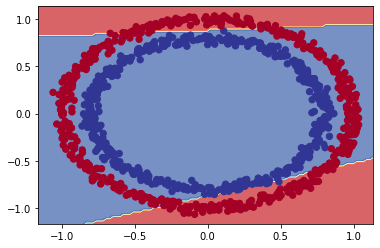

In [ ]:
# Check the decison boundary for our model
plot_decision_boundary(model_5, X, y) 

In [ ]:
# Trying to replicate our model from TensorFlow playground
# Adding activation function for the output layer

# Set random Seed
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
                              tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

histor = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [ ]:
# Evaluate our model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

Doing binary classification


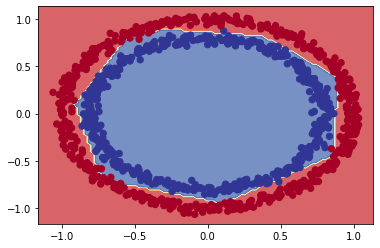

In [ ]:
# Let's visualize decision boundary of our incredible model
plot_decision_boundary(model_6, X, y)

In [ ]:
# Spliting our circles data into train and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting our circles data using indices
X_train_idx, y_train_idx = X[:800], y[:800]
X_test_idx, y_test_idx = X[800:], y[800:]
#len(X), len(X_train), len(X_test), len(y), len(y_train), len(y_test)

In [ ]:
X_train.shape

(800, 2)

### Providing the model with different train and test data sets.

In [ ]:
# Trying to replicate our model from TensorFlow playground
# Adding activation function for the output layer

# Set random Seed
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
                              tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=["accuracy"])

history = model_7.fit(X_train_idx, y_train_idx, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [ ]:
# Evaluate our model (This time with test data that it has never seen before)
model_7.evaluate(X_test_idx, y_test_idx)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849867582321, 1.0]

Doing binary classification
Doing binary classification


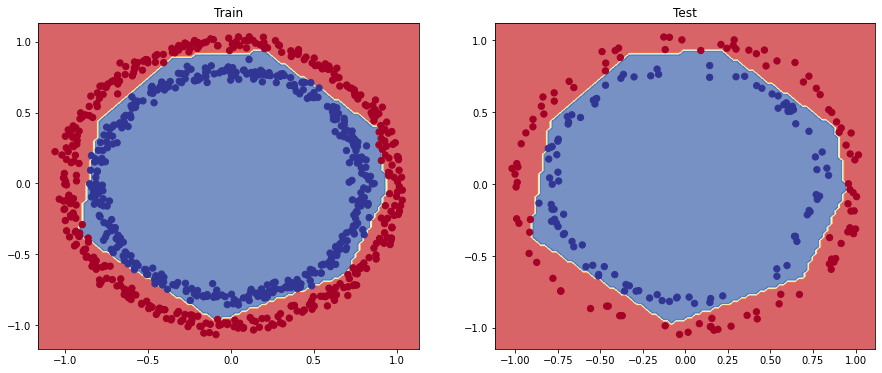

In [ ]:
# Decision boundary on Train and Test data
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_7, X_train_idx, y_train_idx)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_7, X_test_idx, y_test_idx)

We've discussed the concept of linear and non-linear functions, let's see them in actions

In [ ]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

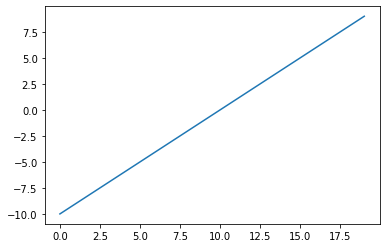

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Replicating sigmoid : sigmoid(x) = 1/(1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [ ]:
# Use sigmoid function on our A tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

In [ ]:
tf.keras.activations.sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5399931e-05, 1.2338161e-04, 3.3542514e-04, 9.1105700e-04,
       2.4726391e-03, 6.6929162e-03, 1.7986238e-02, 4.7425866e-02,
       1.1920291e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330711e-01,
       9.9752736e-01, 9.9908894e-01, 9.9966455e-01, 9.9987662e-01],
      dtype=float32)>

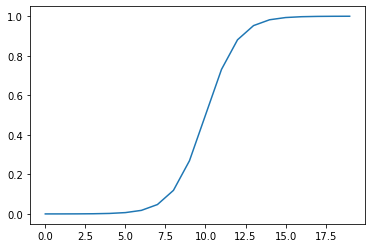

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
# Let's now replicate ReLU function
def relu(x):
  return tf.maximum(x, 0)

In [ ]:
# Use relu on our tensor A
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

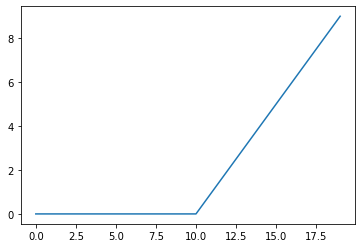

In [ ]:
plt.plot(relu(A))

In [ ]:
# Try the linear activations function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

## Plotting the learning (loss) curve

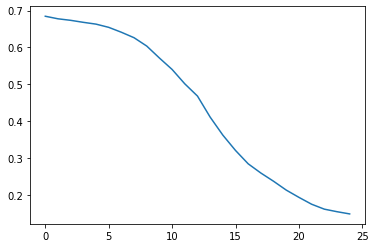

In [ ]:
epochs = np.arange(25)
loss = history.history['loss']
plt.plot(epochs, loss, label="Training data") ;

### Another way to plot the loss curve

In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


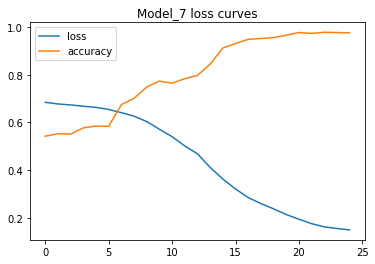

In [ ]:
pd.DataFrame(history.history).plot() 
plt.title("Model_7 loss curves") ;

## Finding the ideal learning rate using **`callback`**


In [ ]:
# Set Random Seed
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

#Fit the model
history_8 = model_8.fit(X_train_idx,
                        y_train_idx,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

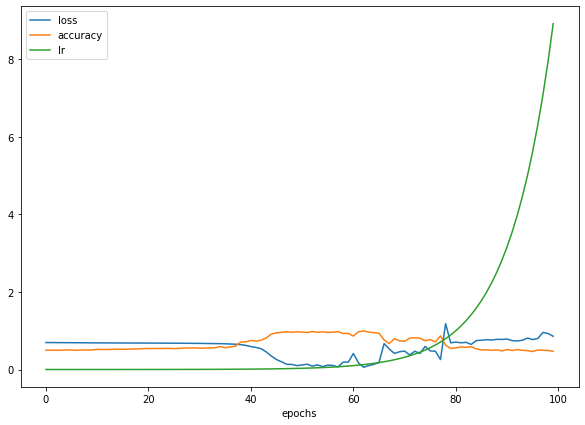

In [ ]:
# Check out the history
pd.DataFrame(history_8.history).plot(figsize=(10, 7), xlabel="epochs")

### Plot the learning rate against the loss curve

Text(0.5, 1.0, 'Learning rate vs loss')

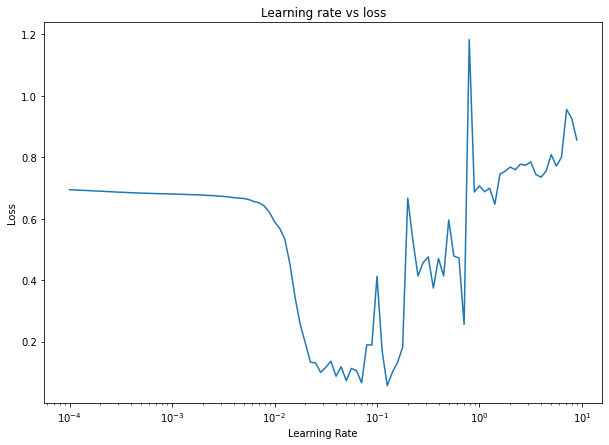

In [ ]:
lrs = 1e-4 * ( 10 **(tf.range(100)/20) ) # 100 is the number of epochs
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_8.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")

### Let's try to use a higher  **ideal** learning rate

In [ ]:
# Set Random Seed
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.02),
                metrics=["accuracy"])

# Create a learning rate callback
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

#Fit the model
history_9 = model_9.fit(X_train_idx,
                        y_train_idx,
                        epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [ ]:
model_9.evaluate(X_test_idx, y_test_idx)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

Doing binary classification
Doing binary classification


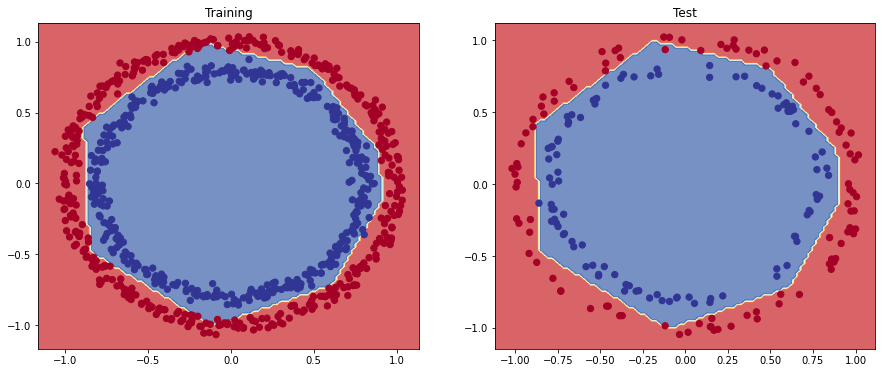

In [ ]:
# Plot decision boundaries for train and test sets
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(model_9, X_train_idx, y_train_idx)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_9, X_test_idx, y_test_idx)

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_9.evaluate(X_test_idx, y_test_idx)
print(f"Model's loss on test set: {loss}")
print(f"Model's accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model's loss on test set: 0.05740184709429741
Model's accuracy on test set: 99.00%


## Make a confusion matrix for our model


In [ ]:
from sklearn.metrics import confusion_matrix

# Make some predictions
y_preds = model_9.predict(X_test_idx)

# Create our confusion matrix
confusion_matrix(y_test_idx, tf.round(y_preds)) # See below to understand "tf.round()"

array([[99,  2],
       [ 0, 99]])

Oops.. looks like our preds array has come out in **predictions probabilitiy** form... the standard output form from sigmoid(or softmax) activaiton functions

In [ ]:
# Convert our preds probabilities to binary format
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

### Making our confusion matrix prettier

In [ ]:
# This code is a remix of scikit-learn's plot_confusion_matrix (This function only accepts estimator which is the scikit-learn model)
def plot_conf_matrix(true_labels=y_test_idx, preds_labels=y_preds):
  import itertools
  figsize = (10, 10)

  # Create the confusion matrix 
  cm = confusion_matrix(true_labels, tf.round(preds_labels))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  #Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  classes = False
  if classes:
    label = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes 
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)
  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)


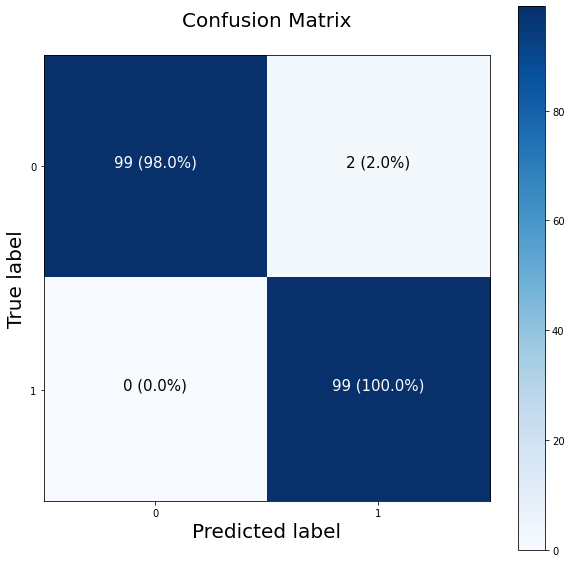

In [ ]:
# Trying out our new function
plot_conf_matrix(y_test_idx, y_preds)

# Multiclass classification problem
We're going to build a neural network to classify images of different items of clothing.


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been split into train and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first train sxample
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shsape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

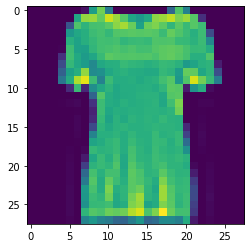

In [ ]:
# Plot a single sample
plt.imshow(train_data[10]) ;

In [ ]:
# Check the sample's label
train_labels[10]

0

In [ ]:
# Create a list so we can index onto our train labels so they're human-readable

class_names = ["T-shirt/Top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneakers", "Bag", "Anke boot"]
len(class_names)

10

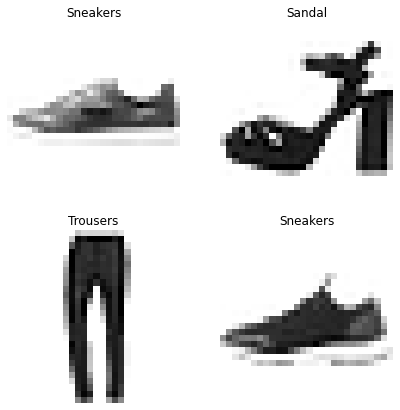

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

If labels are one-hot encoded, use `CategoricalCrossentropy()` loss function.
If labels are integers, use `SparseCategoricalCrossentropy()`.
 * **If you get a shape error** check :
  * your input shape 
  * your output shape
  * your loss function

In [ ]:
tf.random.set_seed(42)

mc_model_1 = tf.keras.Sequential([
                                  #tf.keras.Input(input_shape=(28, 28)),
                                  tf.keras.layers.Flatten(input_shape=(28, 28)),
                                  tf.keras.layers.Dense(4, activation="relu"),
                                  tf.keras.layers.Dense(4, activation="relu"),
                                  tf.keras.layers.Dense(10, activation="softmax")
])
 
mc_model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(), # This loss function accepts the labels as integers 
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])

non_norm_history = mc_model_1.fit(train_data,
                                  tf.one_hot(train_labels, depth=10),
                                  epochs=10,
                                  validation_data = (test_data, tf.one_hot(test_labels, depth=10)))

In [ ]:
# Check the model summary
mc_model_1.summary()

In [ ]:
# Check the min and max value of our training data
train_data.min(), train_data.max()

Neural networks prefer data to be normalized (numbers are between 0 & 1)

In [ ]:
# Let's normalize our data by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the normalized (scaled) data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

### Creating the same exact model except for the used data (This time the data is normalized)

In [ ]:
tf.random.set_seed(42)

mc_model_2 = tf.keras.Sequential([
                                  #tf.keras.Input(input_shape=(28, 28)),
                                  tf.keras.layers.Flatten(input_shape=(28, 28)),
                                  tf.keras.layers.Dense(4, activation="relu"),
                                  tf.keras.layers.Dense(4, activation="relu"),
                                  tf.keras.layers.Dense(10, activation="softmax")
])
 
mc_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # This loss function accepts the labels as integers 
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])

norm_history_1 = mc_model_2.fit(train_data_norm,
                                  train_labels,
                                  epochs=10,
                                  validation_data = (test_data_norm, test_labels))

In [ ]:
# Plotting loss curves of our normalized model and non-normalized model
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.title("model with non-normalized data")
plt.plot(non_norm_history.history["loss"])
plt.subplot(1, 2, 2)
plt.title("model with normalized data")
plt.plot(norm_history.history["loss"])
plt.show() ;

In [ ]:
# Another method to plot loss curves

pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
pd.DataFrame(norm_history.history).plot(title="Normaized data")

## Let's Find the ideal lerning rate 

In [ ]:
tf.random.set_seed(42)

mc_model_3 = tf.keras.Sequential([
                                  #tf.keras.Input(input_shape=(28, 28)),
                                  tf.keras.layers.Flatten(input_shape=(28, 28)),
                                  tf.keras.layers.Dense(4, activation="relu"),
                                  tf.keras.layers.Dense(4, activation="relu"),
                                  tf.keras.layers.Dense(10, activation="softmax")
])
 
mc_model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # This loss function accepts the labels as integers 
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])

# Creating a learning rate scheduler 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

find_lr_history= mc_model_3.fit(train_data_norm,
                                  train_labels,
                                  epochs=40,
                                  validation_data = (test_data_norm, test_labels),
                                  callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

Text(0, 0.5, 'loss')

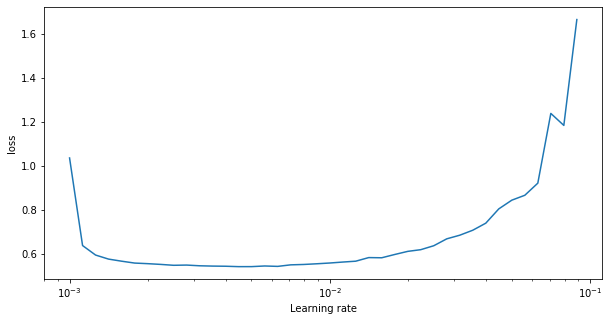

In [ ]:
# Plotting learnign rate vs loss to determine the best learning rate
lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.figure(figsize=(10, 5))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("loss")

The ideal learning rate is nearly 1e-3 (0.001) which is the default value for Adam optimizer

In [ ]:
# Now, refitting a model with the ideal learning rate
tf.random.set_seed(42)

mc_model_3 = tf.keras.Sequential([
                                  #tf.keras.Input(input_shape=(28, 28)),
                                  tf.keras.layers.Flatten(input_shape=(28, 28)),
                                  tf.keras.layers.Dense(4, activation="relu"),
                                  tf.keras.layers.Dense(4, activation="relu"),
                                  tf.keras.layers.Dense(10, activation="softmax")
])
 
mc_model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # This loss function accepts the labels as integers 
                   optimizer=tf.keras.optimizers.Adam(0.001),
                   metrics=["accuracy"])

norm_history_2= mc_model_3.fit(train_data_norm,
                                  train_labels,
                                  epochs=20,
                                  validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluating our model by Creating a confusion matrix

In [ ]:
mc_model_3.evaluate(test_data, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 186.8307 - accuracy: 0.6690


[186.83071899414062, 0.6690000295639038]

In [ ]:

def plot_conf_matrix(true_labels=y_test_idx, preds_labels=y_preds, classes=None, figsize=(10, 10), text_size=15):
  import itertools

  # Create the confusion matrix 
  cm = confusion_matrix(true_labels, tf.round(preds_labels))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  #Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

# Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes 
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(20)
  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)


In [ ]:
# Make some predictions
y_probs = mc_model_3.predict(test_data_norm)

# View the first 5 preds
y_probs[:5]

# Find the first predictions
pred_0 = tf.argmax(y_probs[0])

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 predictions labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
y_preds[:10] == test_labels[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                      y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

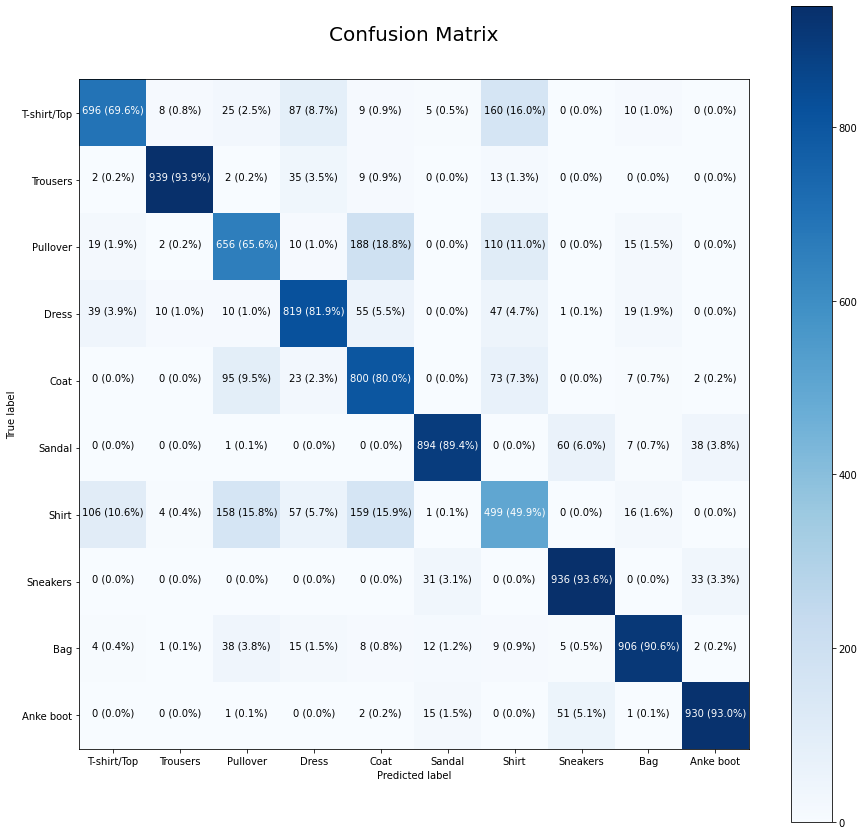

In [ ]:
# Make confusion matrix prettier
plot_conf_matrix(true_labels=test_labels, 
                 preds_labels=y_preds,
                 classes=class_names,
                 figsize=(15, 15),text_size=10)

### We're going to make a little fuction to
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label and the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, class_names):
  """
  Picks 4 random images, plots them and labels them with a prediction and truth label
  """
  # Set up a figure size
  plt.figure(figsize=(10, 10))
  

  # Create predictions and targets
  for i in range(4):
    r = random.randint(0, len(images))
    plt.subplot(2, 2, i+1)
    target_image =  images[r]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = class_names[pred_probs.argmax()]
    true_label = class_names[true_labels[r]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on whether prediction is corrent of wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"
    
    # Add xlabel information (prediction/ true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100 * tf.reduce_max(pred_probs), true_label),
              color=color)
    


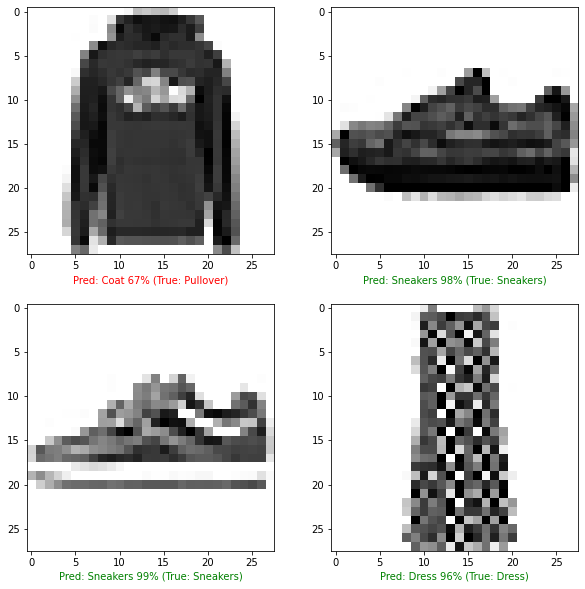

In [ ]:
plot_random_image(model=mc_model_3,
                  images=test_data_norm,
                  true_labels=test_labels,
                  class_names=class_names)

## What patterns is our model learning ?

In [ ]:
# Find the layers of our model
mc_model_3.layers

In [ ]:
# Extract a particular layer
mc_model_3.layers[1]

In [ ]:
# Find the pattern learned by a layer
weights, biases = mc_model_3.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

In [ ]:
mc_model_3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 4)                 3140      
                                                                 
 dense_32 (Dense)            (None, 4)                 20        
                                                                 
 dense_33 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check out bias vector
biases, biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

## Let's check out another way to view our deep learning model


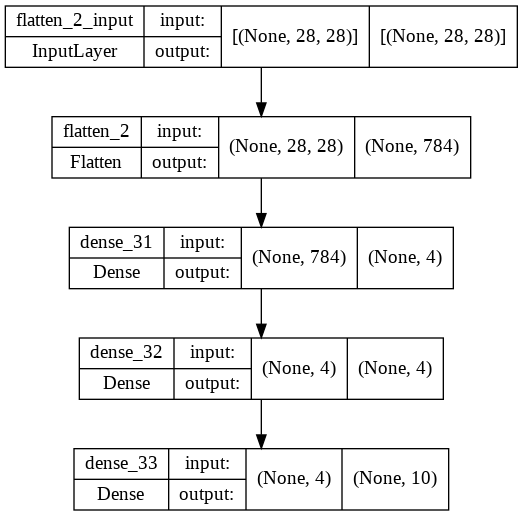

In [ ]:
from tensorflow.keras.utils import plot_model
# See the input and outputs of each layer
plot_model(mc_model_3, show_shapes=True)